In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageColor
import random

In [3]:
# Data load
train_file_path = "./dataset/train.json"
with open(train_file_path) as file:
    json_file = json.loads(file.read())

images = pd.DataFrame(json_file["images"])
annotations = pd.DataFrame(json_file["annotations"])

print("--------------images-------------------")
print(images.head(5))
print()

print("--------------annotations-------------------")
print(annotations.head(5))

--------------images-------------------
   width  height       file_name  license flickr_url coco_url  \
0   1024    1024  train/0000.jpg        0       None     None   
1   1024    1024  train/0001.jpg        0       None     None   
2   1024    1024  train/0002.jpg        0       None     None   
3   1024    1024  train/0003.jpg        0       None     None   
4   1024    1024  train/0004.jpg        0       None     None   

         date_captured  id  
0  2020-12-26 14:44:23   0  
1  2021-01-10 16:30:39   1  
2  2020-12-27 17:55:52   2  
3  2021-03-31 12:10:36   3  
4  2021-01-01 18:52:38   4  

--------------annotations-------------------
   image_id  category_id       area                          bbox  iscrowd  id
0         0            0  257301.66  [197.6, 193.7, 547.8, 469.7]        0   0
1         1            3   10402.56     [0.0, 407.4, 57.6, 180.6]        0   1
2         1            7   26259.36    [0.0, 455.6, 144.6, 181.6]        0   2
3         1            4   69096.

In [4]:
# image, annotation 개수
print("<image, annotation 개수>")
print("images : ", len(images))
print("annotations : ", len(annotations))

<image, annotation 개수>
images :  4883
annotations :  23144


In [5]:
# 이미지 파일 확장자 확인
extensions = set()

for file_name in images["file_name"]:
    ext = file_name.split(".")[-1]
    extensions.add(ext)

print("<이미지 파일 확장자>")
print("extensions : ", extensions)

<이미지 파일 확장자>
extensions :  {'jpg'}


In [5]:
# bounding box 그리기
def drawBoundingBox(img_id):
    img_path = f"./dataset/train/{str(img_id).zfill(4)}.jpg"
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)

    colors = ["Red", "Orange", "Green", "Yellow", "Brown", "Blue", "Pink", "Turquoise", "Violet", "White"] 
    anns = annotations[annotations["image_id"] == img_id]
    for _, ann in anns.iterrows():
        box = ann.bbox
        category = ann.category_id
        draw.rectangle((box[0], box[1], box[0] + box[2], box[1] + box[3]), outline = ImageColor.getrgb(colors[category]), width=3)
    return img


image 당 annotaion 평균 :  4.739709195166905
annotation max :  71
annotation min :  1
1     1980
2      783
3      405
4      259
5      218
6      166
7      157
9      107
8      102
10      88
11      67
12      66
16      49
13      48
14      46
15      45
17      40
18      27
20      23
19      23
22      20
26      17
24      16
21      16
23      15
25      14
28      13
27      11
32       9
31       9
34       6
30       5
29       5
40       3
37       3
33       3
38       3
46       3
35       3
39       2
42       2
52       1
48       1
44       1
41       1
55       1
71       1
Name: image_id, dtype: int64


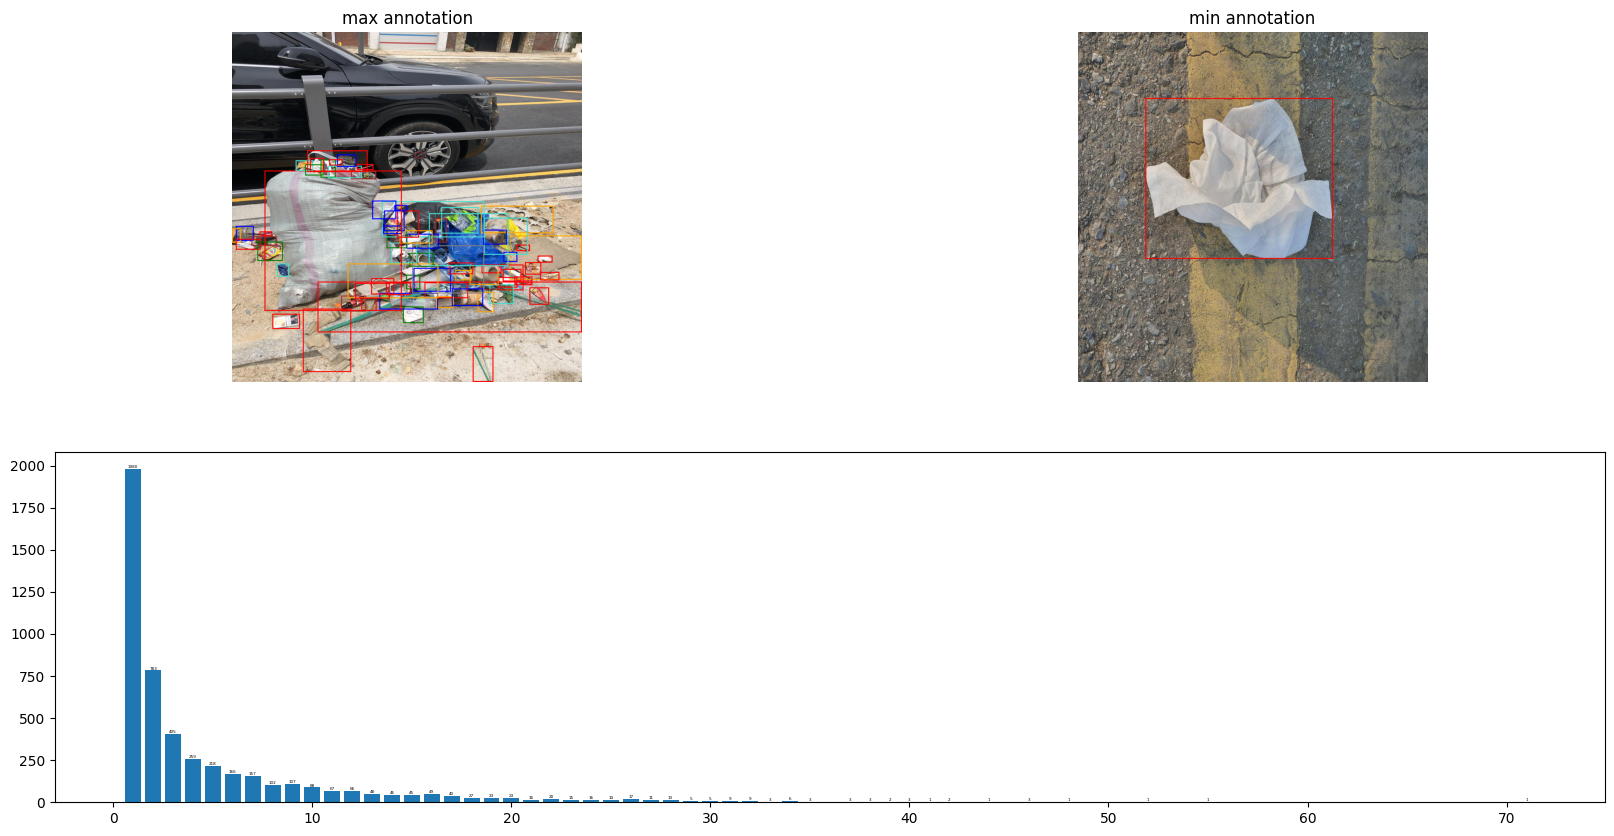

In [40]:
# 이미지 별 annotation 개수
print("image 당 annotaion 평균 : ", len(annotations)/len(images))

annotaion_per_image = annotations["image_id"].value_counts().sort_index()

plt.figure(figsize=(20,10))

# 최대값
max_ann_idx = annotaion_per_image.idxmax()
max_ann = annotaion_per_image.max()
print("annotation max : ", max_ann)
plt.subplot(2,2,1)
plt.title("max annotation")
plt.axis("off")
plt.imshow(drawBoundingBox(max_ann_idx))

# 최소값
min_ann_idx = annotaion_per_image.idxmin()
min_ann = annotaion_per_image.min()
print("annotation min : ", min_ann)
plt.subplot(2,2,2)
plt.title("min annotation")
plt.axis("off")
plt.imshow(drawBoundingBox(min_ann_idx))

# annotation 개수 분포
plt.subplot(2,1,2)
annotation_distribution = annotaion_per_image.value_counts()
bar = plt.bar(annotation_distribution.index, annotation_distribution.values)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha = "center", va = "bottom", size = 3)
print(annotaion_per_image.value_counts())


plt.show()

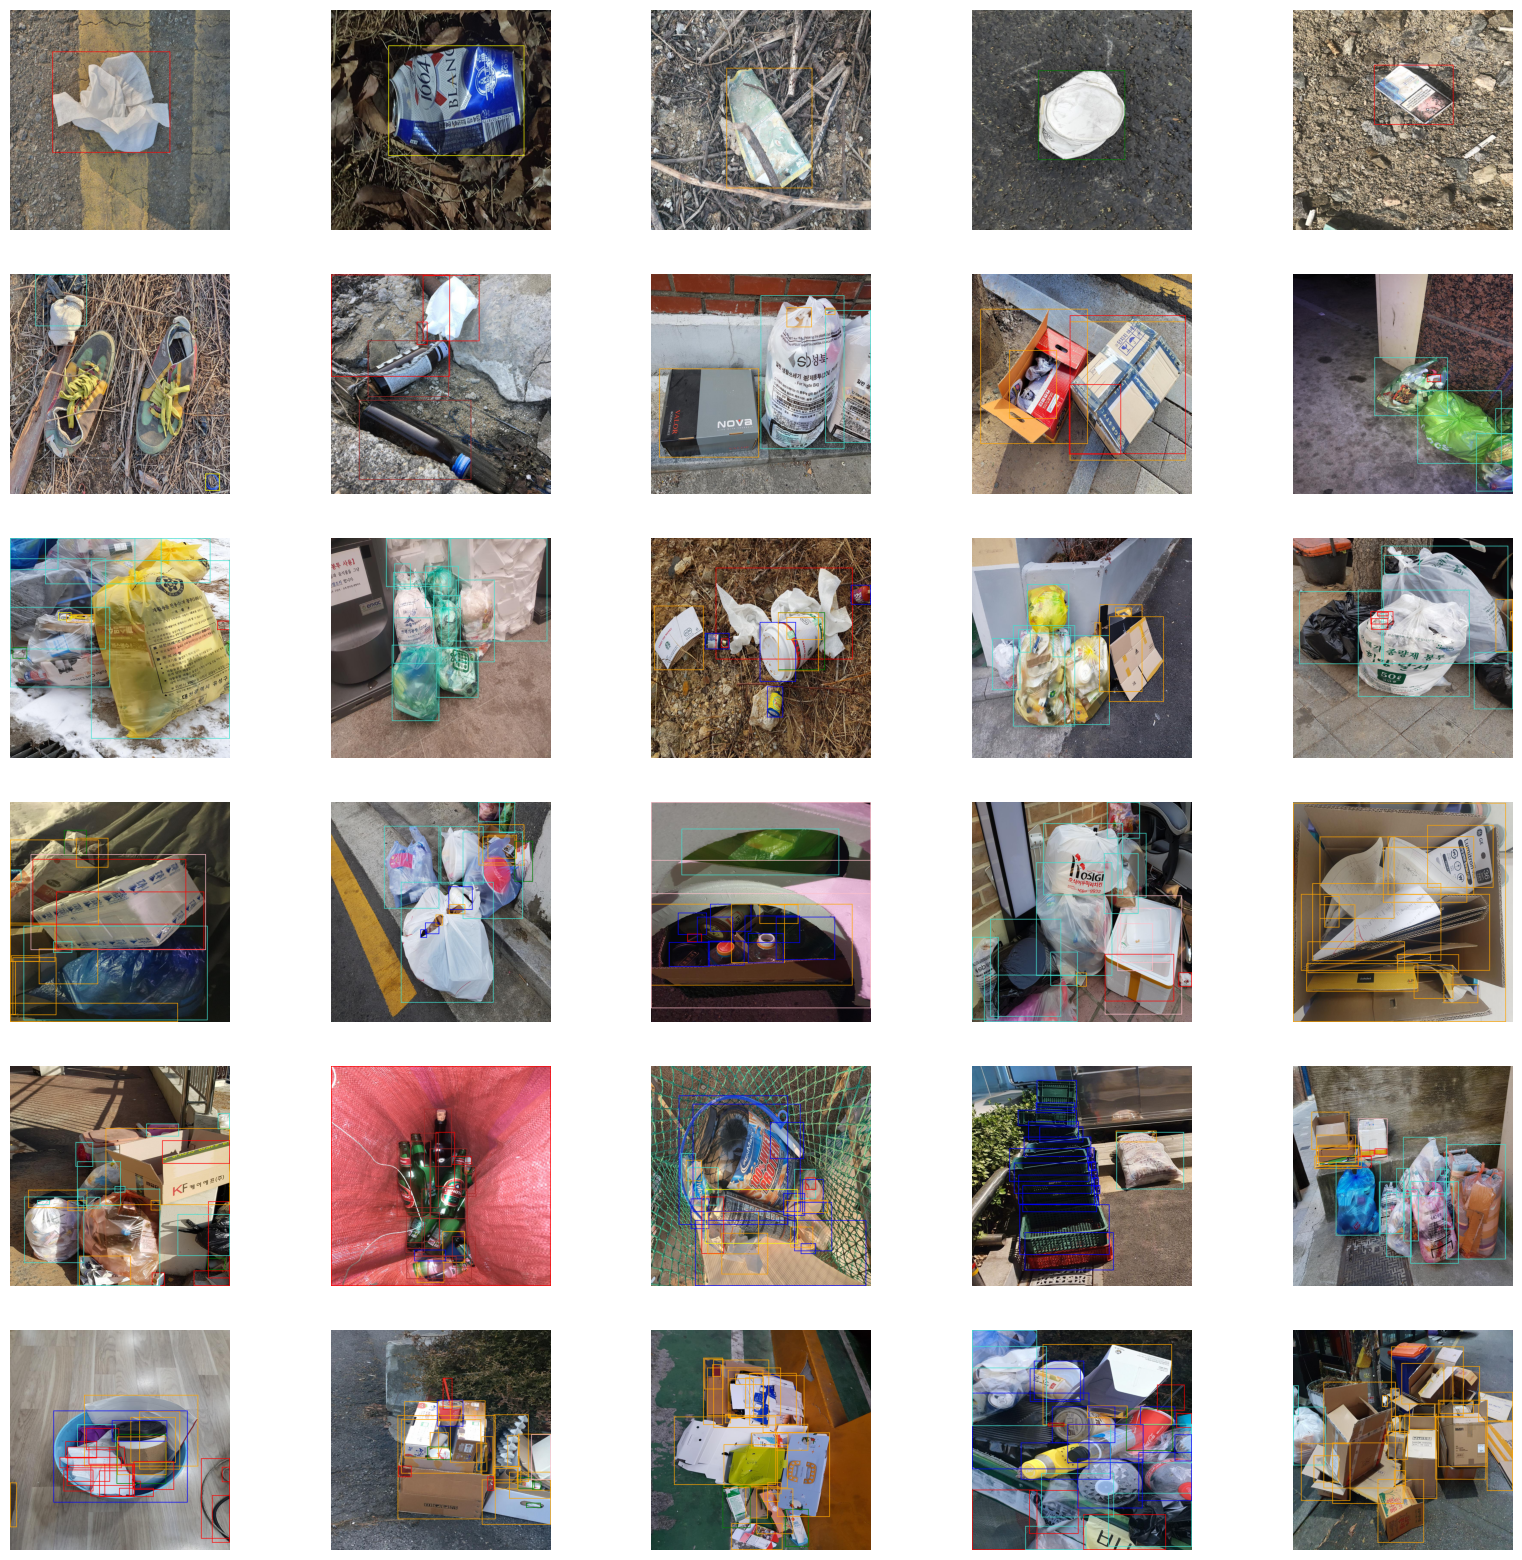

In [56]:
# annotation 개수 별 이미지 확인
cnts = [1,5,10,15,20,25]

plt.figure(figsize=(20,20))
for i, cnt in enumerate(cnts):
    index = annotaion_per_image.loc[annotaion_per_image == cnt].index
    for j in range(5):
        plt.subplot(len(cnts), 5,  i * 5 + j + 1 )
        plt.axis("off")
        plt.imshow(drawBoundingBox(index[j]))
        

<annotation size>
max :  1048371.21
min :  0.56


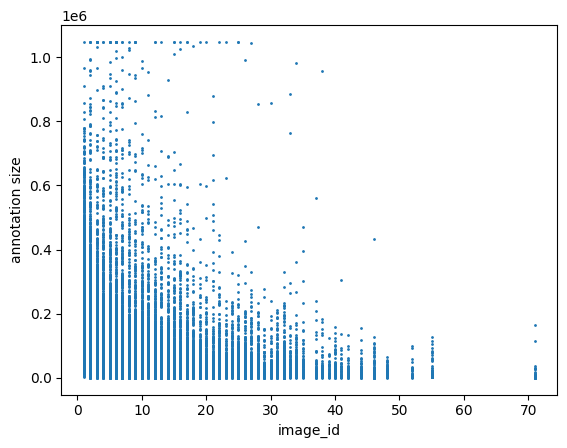

In [16]:
# annotation 크기 (개수와 크기 관계)

ann_size = []
ann_cnt = []

for idx, ann in annotations.iterrows():
    ann_size.append(ann["area"])
    ann_cnt.append(annotaion_per_image[int(ann["image_id"])])

print("<annotation size>")
print("max : ", max(ann_size))
print("min : ", min(ann_size))

plt.scatter(ann_cnt, ann_size, s=1)
plt.xlabel("image_id")
plt.ylabel("annotation size")
plt.show()

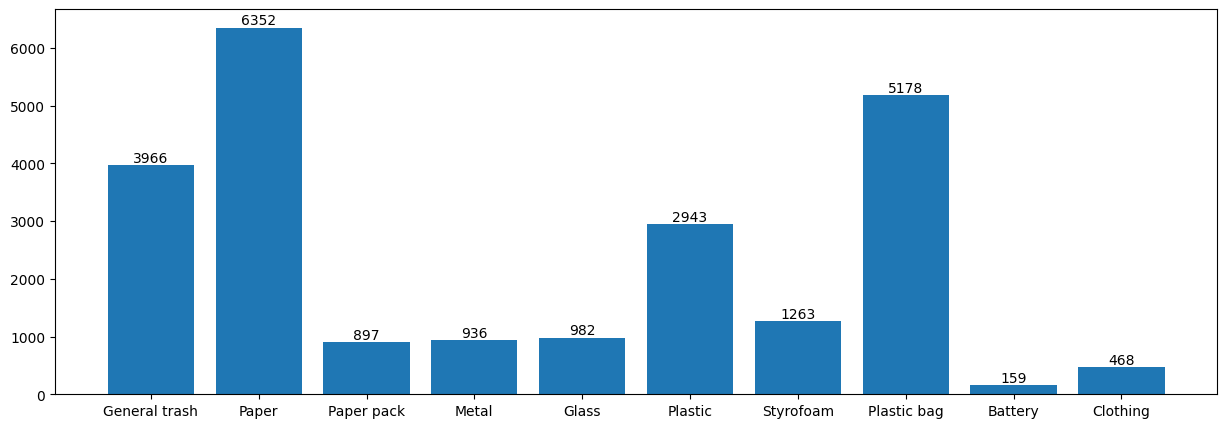

In [26]:
# annotation 분포 (카테고리)
categories = ["General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
category_cnt = [0] * 10

for cat in annotations["category_id"]:
    category_cnt[cat] += 1

plt.figure(figsize=(15,5))
bar = plt.bar(categories, category_cnt)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha = "center", va = "bottom", size = 10)
plt.show()

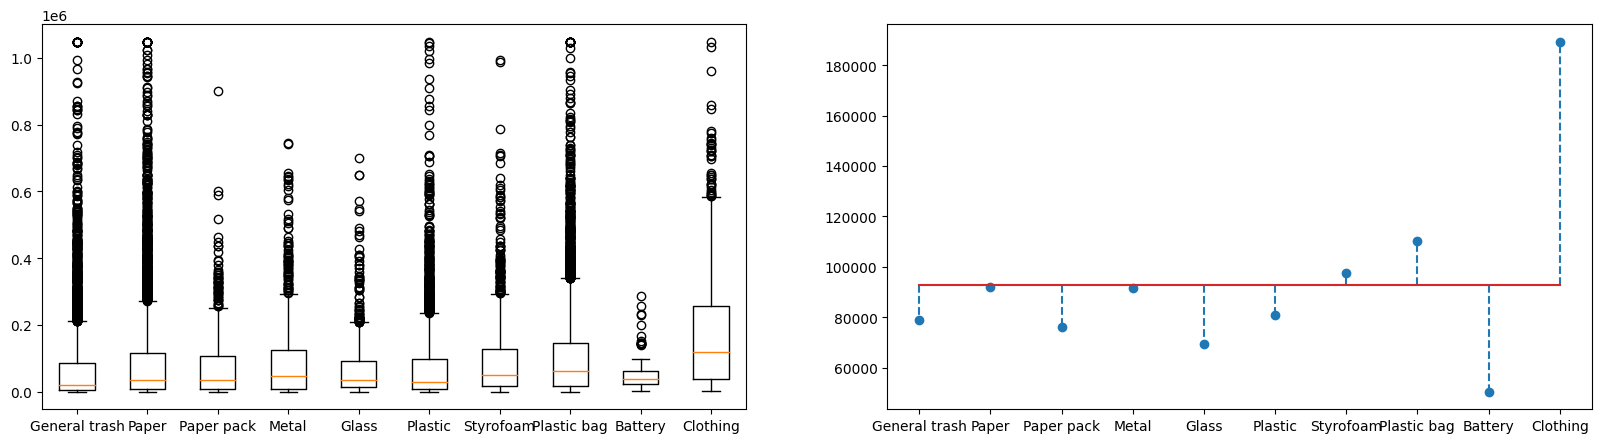

In [37]:
# 카테고리 별 annotation 크기

sizes = [[] for i in range(10)]

for idx, row in annotations.iterrows():
    cat = row["category_id"]
    size = row["area"]
    sizes[cat].append(size)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.boxplot(sizes)
plt.xticks(range(1,11), categories)


plt.subplot(1,2,2)
mean_category = [sum(arr)/len(arr) for arr in sizes]
mean = sum(ann_size)/len(ann_size)
markers, stemlines, baseline = plt.stem(categories, mean_category, bottom=mean)
stemlines.set_linestyle("--")

plt.show()


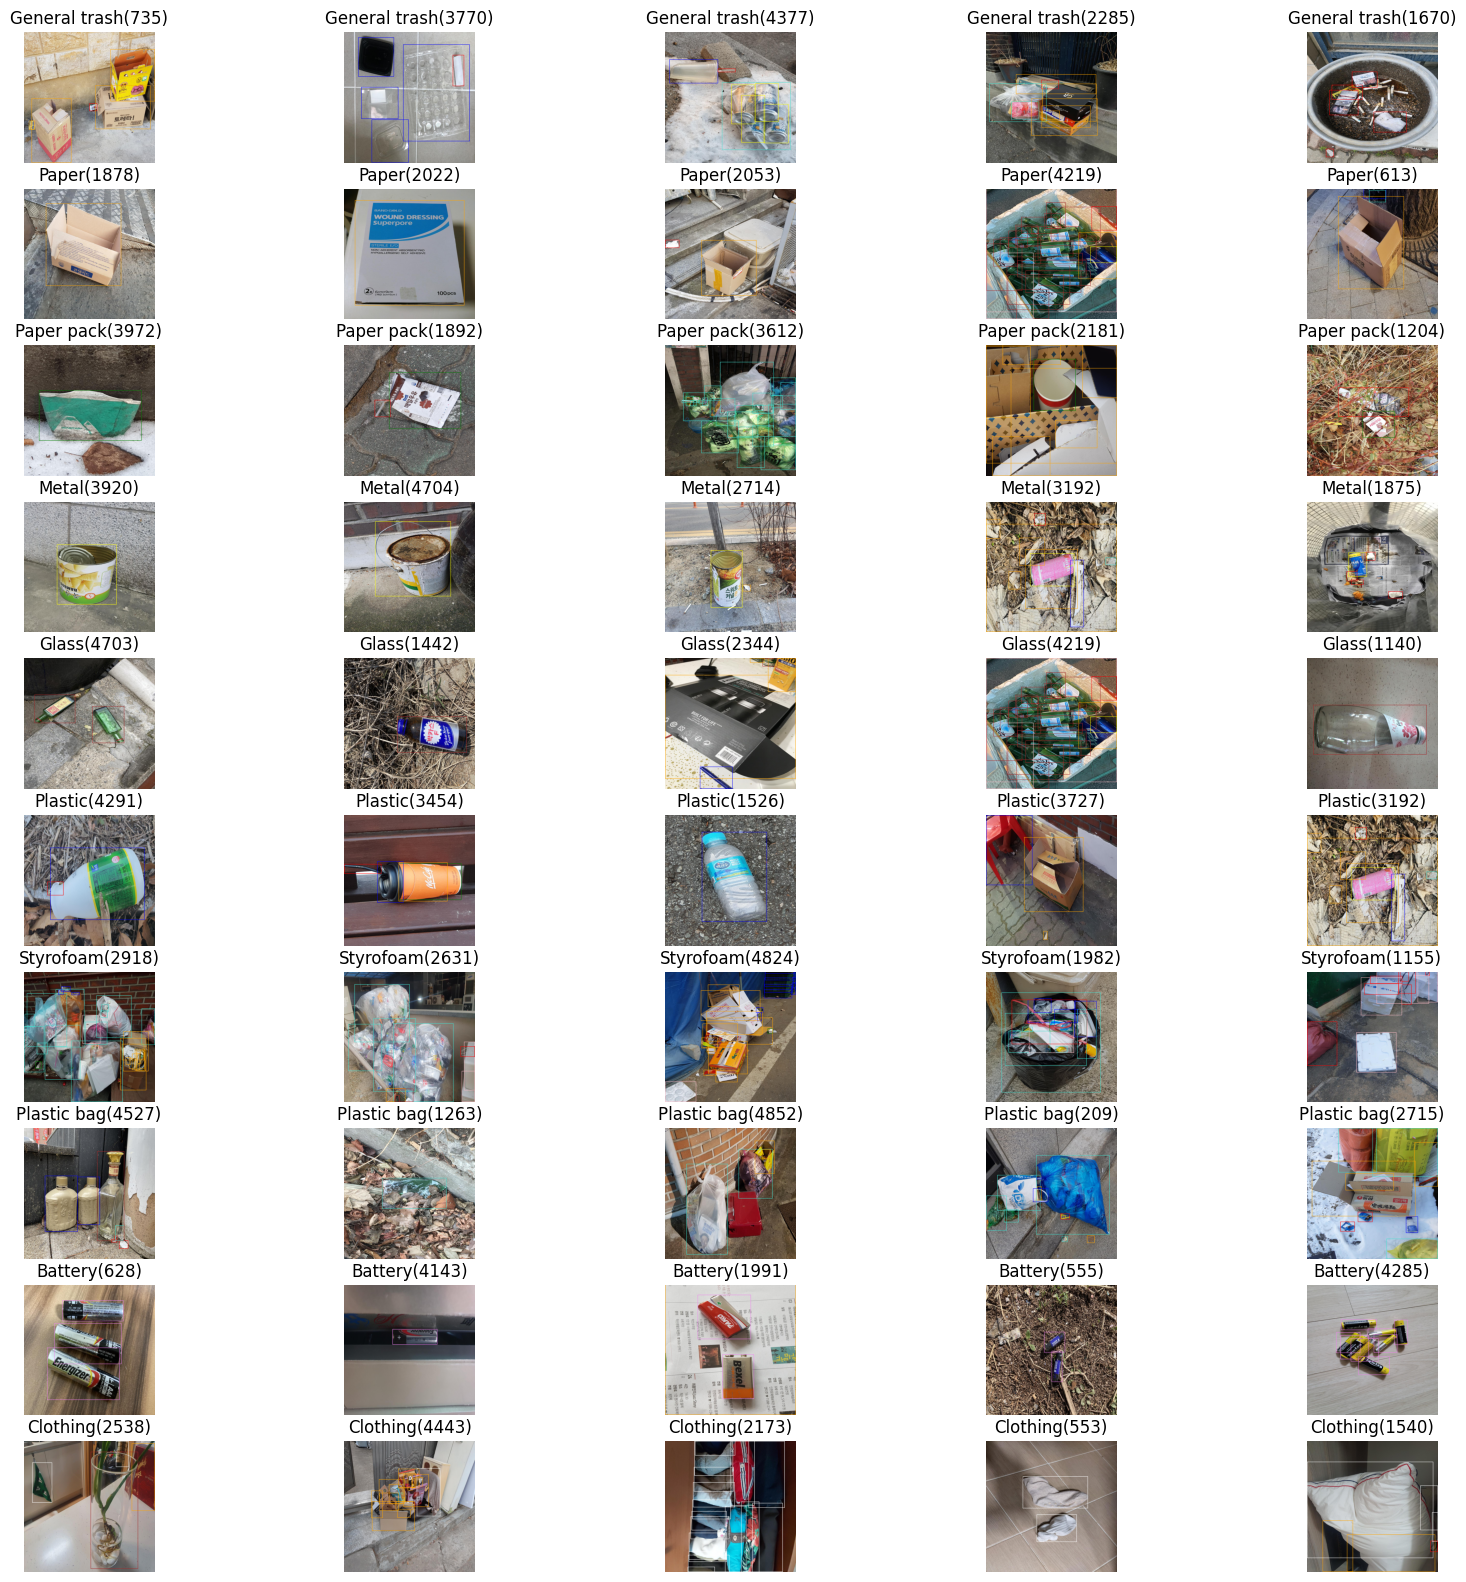

In [72]:
# 카테고리 별 이미지 확인

plt.figure(figsize=(20,20))
plt.tight_layout()
for i, cat in enumerate(range(10)):
    index = random.sample(set(annotations[annotations["category_id"] == cat]["image_id"].tolist()), 5)
    for j in range(5):
        plt.subplot(10, 5,  i * 5 + j + 1 )
        plt.title(categories[cat] + f"({index[j]})")
        plt.axis("off")
        plt.imshow(drawBoundingBox(index[j]))